## I. Introduction

In [235]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.linear_model import LogisticRegression

In [236]:
data = pd.read_csv('heart_disease_dataset.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [194]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Đây là 14 thuộc tính trong dataset**
- age: tuổi tính theo năm (độ tuổi từ 29 - 77)
- sex: giới tính (1: nam, 0: nữ)
- cp (chest pain): Các loại đau thắt ngực 
    - 0: typical angina (Đau thắt ngực điển hình)
    - 1: atypical angina (Đau thắt ngực không điển hình)
    - 2: non-anginal pain (Đau không phải là đau thắt ngực)
    - 3: asymtomatic (Không có triệu chứng)
- trestbps (resting blood pressure): huyết áp lúc nghỉ (mmHg)
- chol (cholesterol): cholestoral trong huyết thanh (mg/dl)
- fbs (fasting blood sugar): đường huyết lúc đói (> 120 mg/dl, 1 = true, 0 = false)
- restecg (resting electrocardiogram): điện tâm đồ lúc nghỉ
    - 0: bình thường
    - 1: có sóng ST-T bất thường
    - 2: có khả năng hoặc chắc chắn đã xuất hiện tăng thể tích thất trái của tim
- thalach (maximum heart rate achieved): tần số tim tối đa đạt được.
- exang (exercise-induced angina): đau thắt ngực do tập luyện (1: có, 2 không)
- oldpeak: chỉ số thể hiện độ giảm của segment ST của sóng ECG trên trục thời gian sau khi tập thể dục
- slope: mô tả độ dốc của đoạn ST của sóng điện tâm đồ (ECG) trong giai đoạn đỉnh (peak exercise) của bài kiểm tra thể lực
    - 0: dốc lên
    - 1: phẳng
    - 2: dốc xuống
- ca (number of major vessels): số lượng các mạch chính bị tắc nghẽn trong bộ máy mạch máu của tim mạch
- thal (thalassemia): bệnh thiếu máu do tan máu,
    - 0: lỗi
    - 1: bình thường
    - 2: khuyết tật cố định trong tim mạch (gây ra rủi ro cho sức khỏe)
    - 3: khuyết tật có thể đảo ngược (tổn thương đó có thể được chữa trị hoặc phục hồi)
- target: chẩn đoán bệnh tim (0: không, 1: có)
    

In [195]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [196]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [197]:
data['target'] = data['target'].replace({0: 'Presence', 1: 'Absence'})

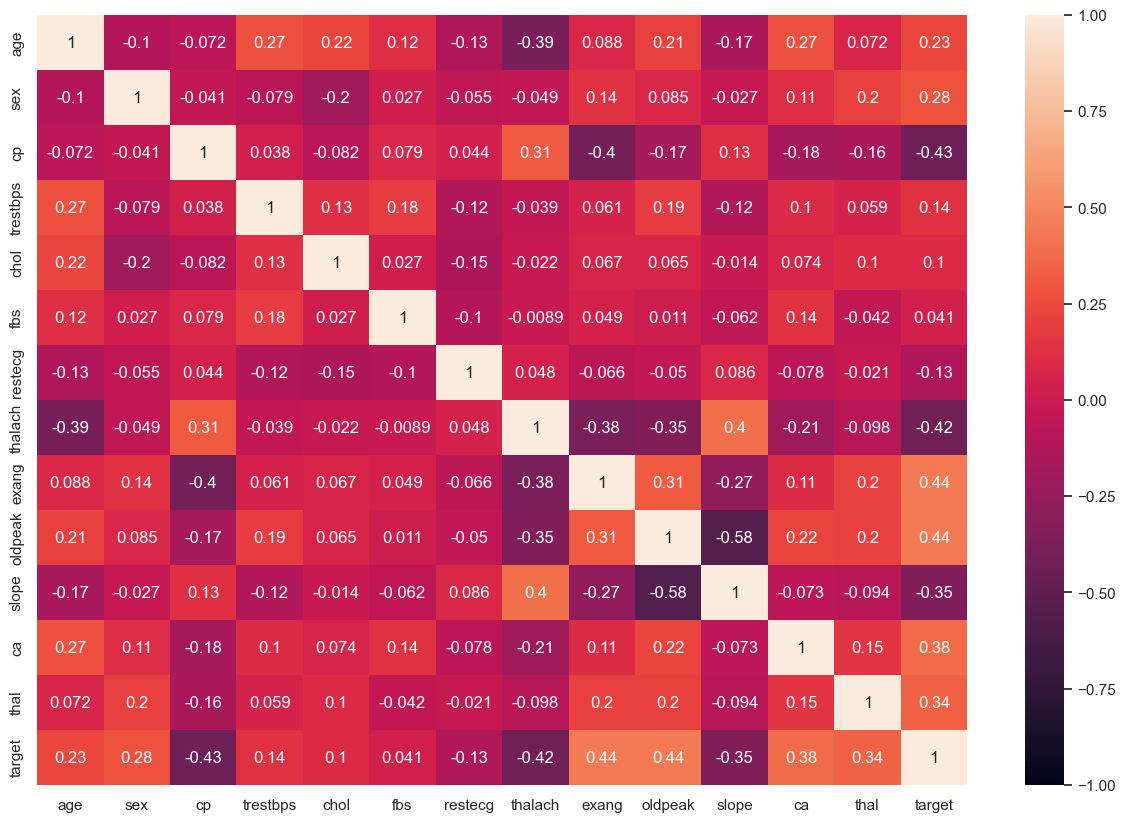

In [237]:
#check data korelasinya
correlation = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation, vmax=1, vmin=-1, annot=True)

# show it
plt.show()

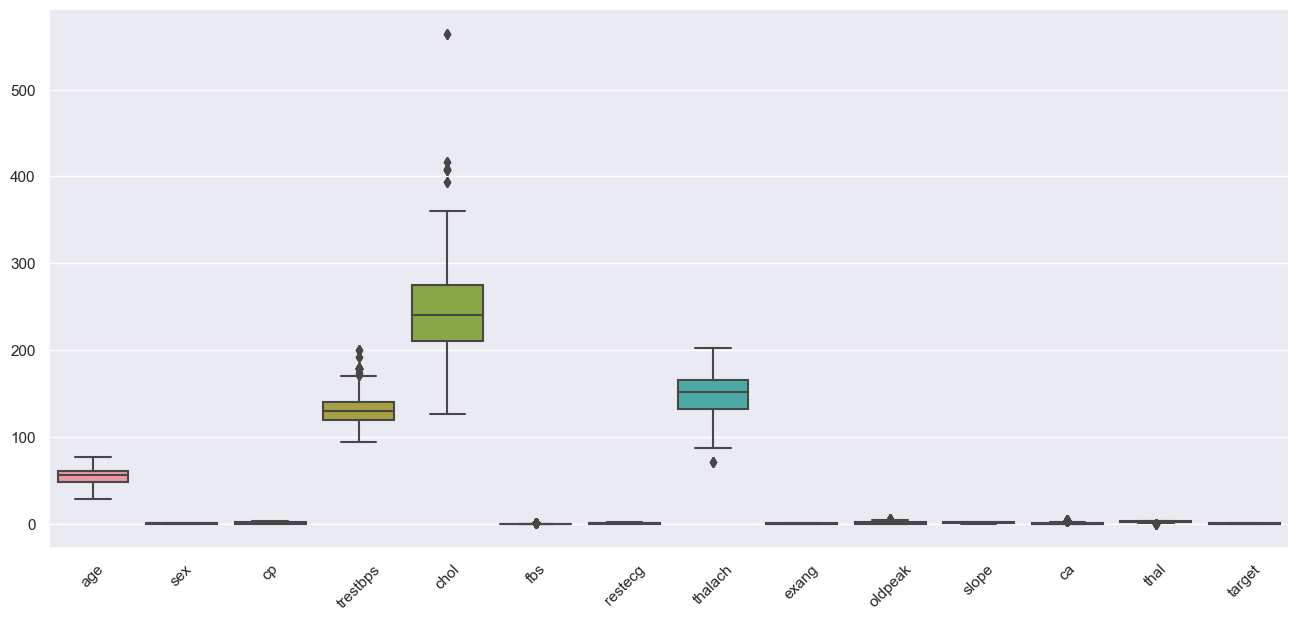

In [238]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

C:\Users\TotNguyen\AppData\Local\Temp\ipykernel_10424\272403213.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


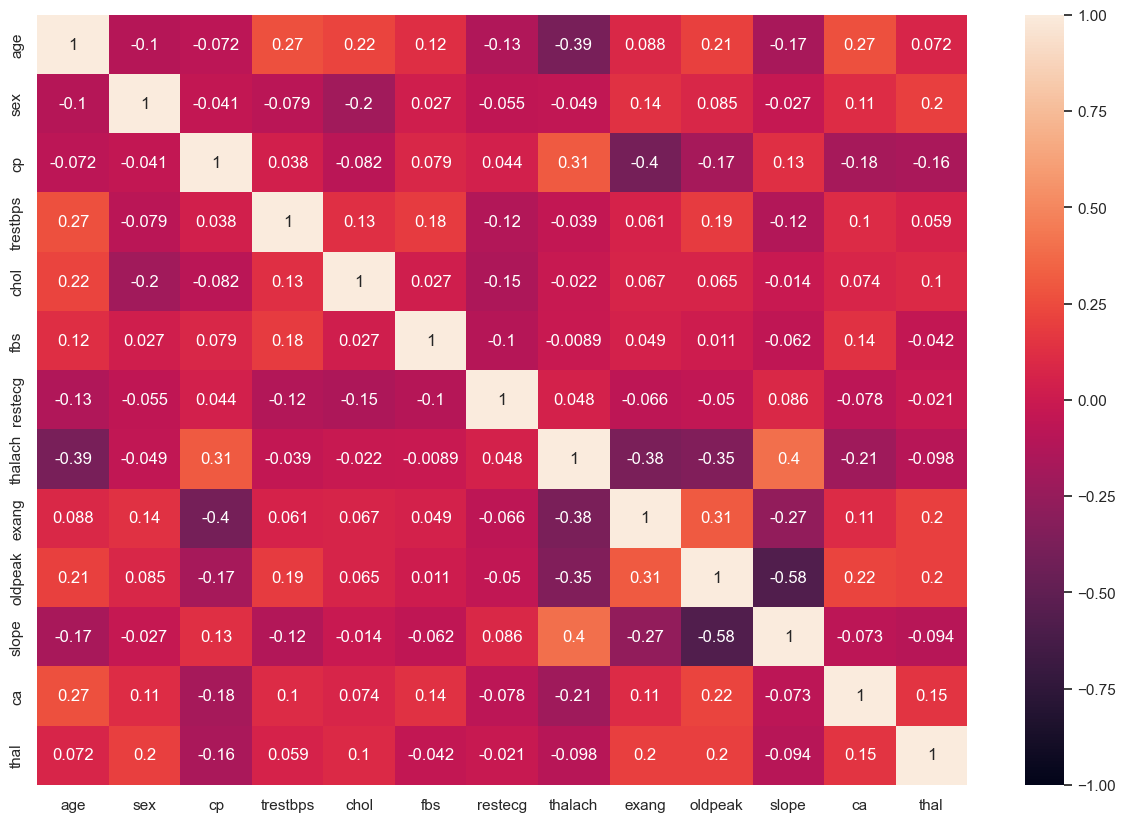

In [200]:
#check data korelasinya
correlation = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation, vmax=1, vmin=-1, annot=True)

# show it
plt.show()

In [201]:
hd = data.groupby('target')['target'].size()
hd

target
Absence     526
Presence    499
Name: target, dtype: int64

In [202]:
data['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

columns 'thal' have few outliers

<AxesSubplot: >

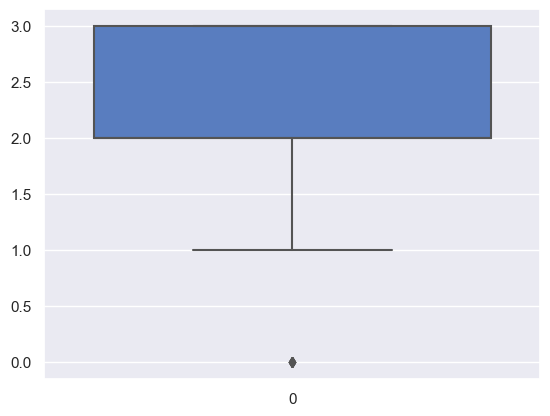

In [203]:
sns.boxplot(data['thal'])

In [204]:
data[data['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,Presence
319,53,0,2,128,216,0,0,115,0,0.0,2,0,0,Absence
329,53,0,2,128,216,0,0,115,0,0.0,2,0,0,Absence
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,Absence
686,52,1,0,128,204,1,1,156,1,1.0,1,0,0,Presence
734,52,1,0,128,204,1,1,156,1,1.0,1,0,0,Presence
893,52,1,0,128,204,1,1,156,1,1.0,1,0,0,Presence


In [205]:
data['thal'].replace(0, 2, inplace=True)

In [206]:
data['thal'].value_counts()

2    551
3    410
1     64
Name: thal, dtype: int64

## II. Trực quan hoá

#Pie Chart of Heart Diesease Population % using Matplotib

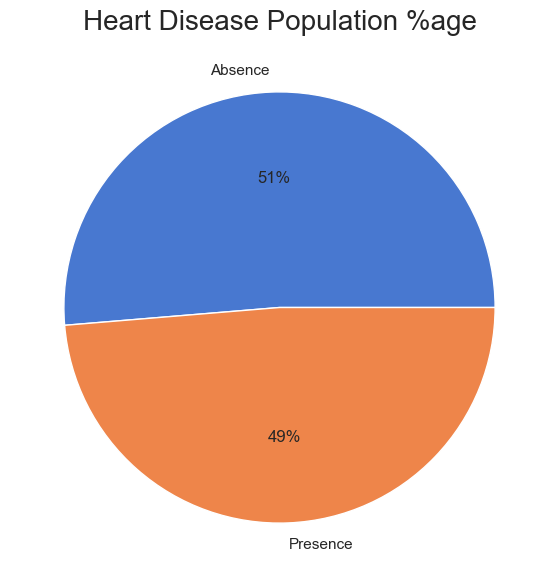

In [207]:
plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absence', 'Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %age', fontsize=20)
plt.show()

From the overall population, people having disease (51%) are same those who doesn't have heart disease (49%)

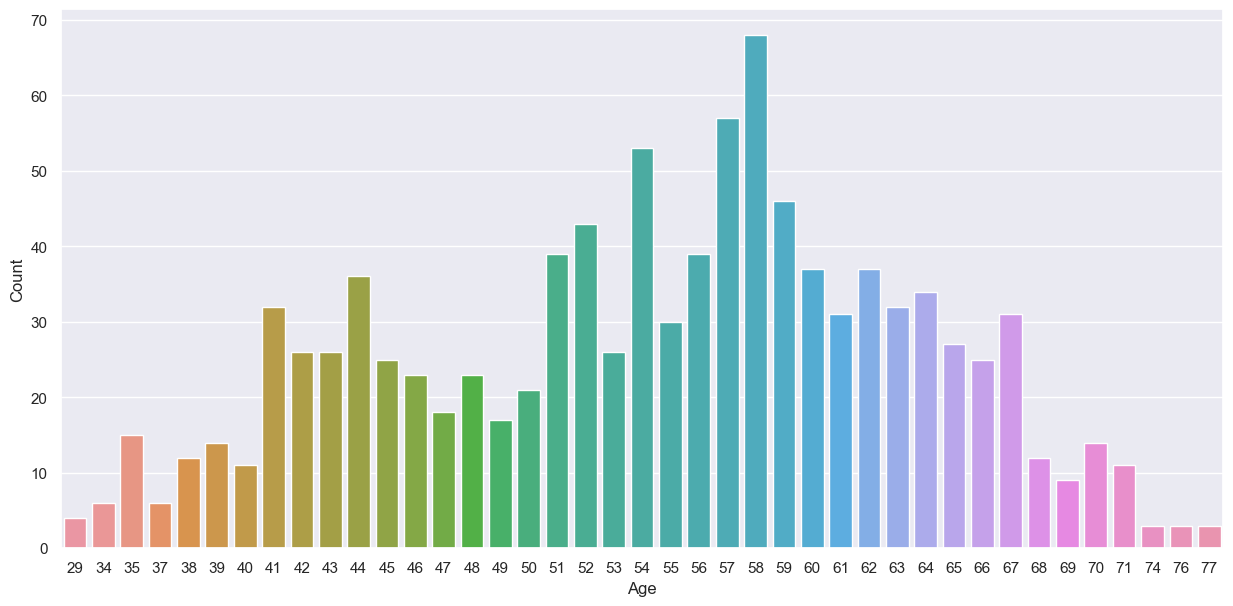

In [208]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.xlabel(xlabel='Age')
plt.ylabel(ylabel='Count')
plt.show()

#Stats

In [209]:
Min_age = data['age'].min()
Max_age = data['age'].max()
Mean_age = data['age'].mean()
print(Min_age, Max_age, Mean_age)

29 77 54.43414634146342


#Categorical Analysis

In [210]:
Young_age = data[(data['age'] >= 29) & (data['age'] < 40)]
Mid_age = data[(data['age'] >= 40) & (data['age'] < 55)]
Old_age = data[(data['age'] >= 55)]

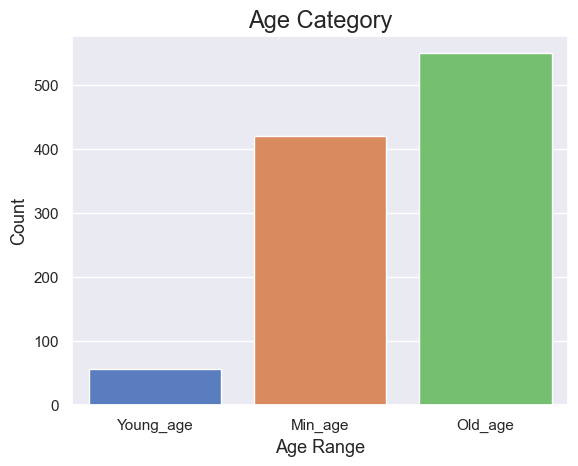

In [211]:
sns.barplot(x=['Young_age', 'Min_age', 'Old_age'], y=[len(Young_age), len(Mid_age), len(Old_age)])
plt.title('Age Category', fontsize=17)
plt.xlabel(xlabel='Age Range', fontsize=13)
plt.ylabel(ylabel='Count', fontsize=13)
plt.show()

In [212]:
def Sex(row):
    if (row == 1):
        return 'Male'
    else:
        return 'Female'

In [213]:
data['Sex1'] = data['sex'].apply(Sex)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Presence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Presence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Presence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Presence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Presence,Female


In [214]:
def Age_range(row):
    if (row >= 29 and row < 40):
        return 'Young'
    elif (row >= 40 and row < 55):
        return 'Mid'
    else:
        return 'Old'

In [215]:
data['Age_range'] = data['age'].apply(Age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Sex1,Age_range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Presence,Male,Mid
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,Presence,Male,Mid
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Presence,Male,Old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,Presence,Male,Old
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,Presence,Female,Old


c:\Users\TotNguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\TotNguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


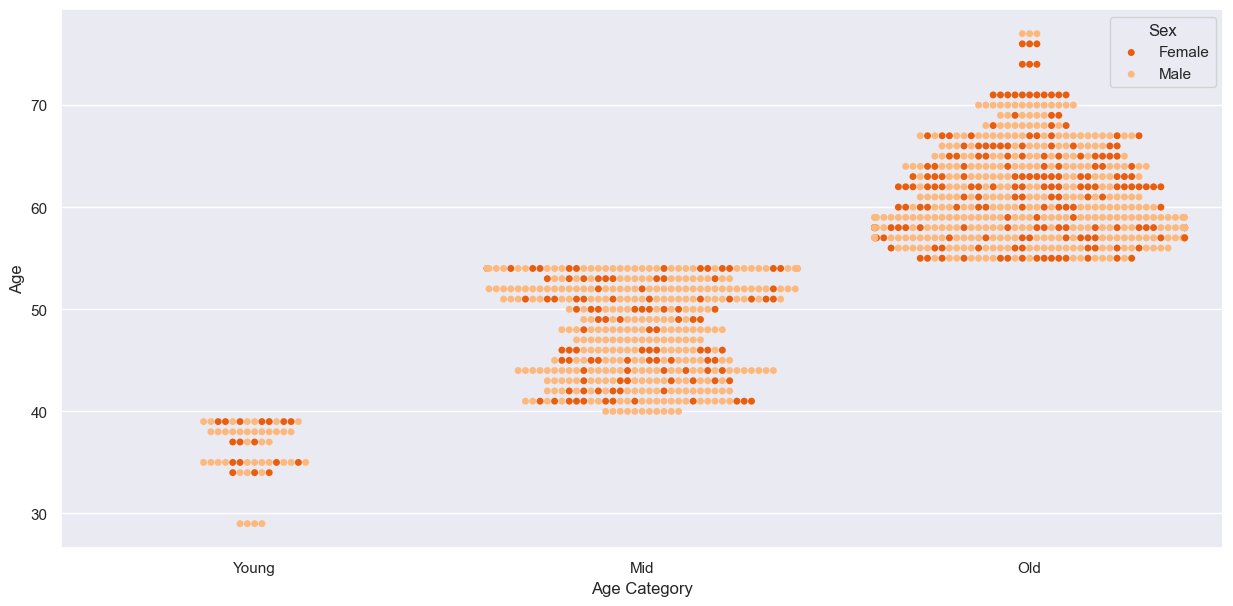

In [216]:

plt.figure(figsize=(15,7))
sns.swarmplot(x='Age_range', y='age', hue='sex', data=data, order=['Young', 'Mid', 'Old'], palette='Oranges_r')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.show()

In our population number of males are more in 3 age category

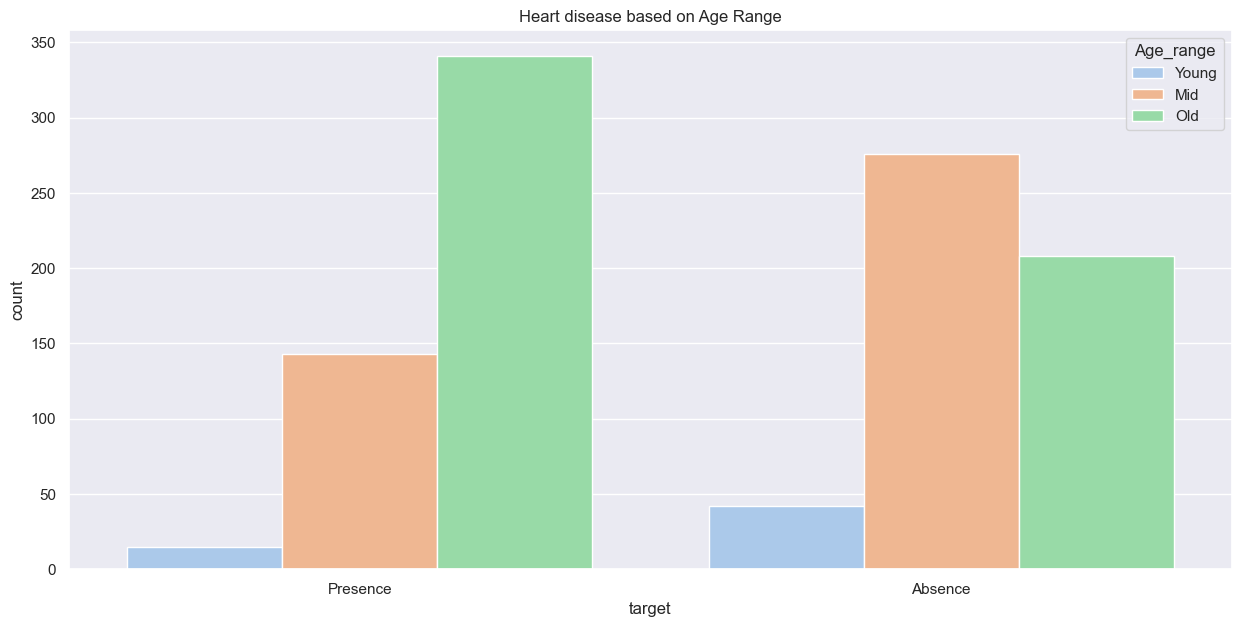

In [217]:
plt.figure(figsize=(15,7))
sns.countplot(x='target', hue='Age_range', data=data, order=['Presence', 'Absence'],
              hue_order=['Young', 'Mid', 'Old'], palette='pastel')
plt.title("Heart disease based on Age Range")
plt.show()

Mid and Old people are more affected by Heart Disease compared to Young ages and Old aged people are more free from Head Disease compared to other ages


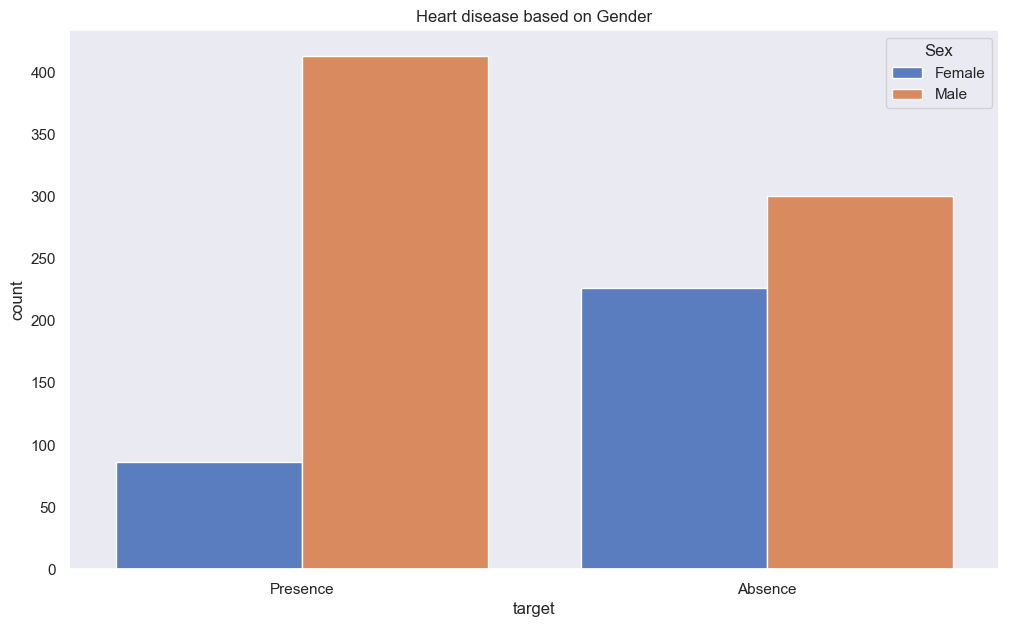

In [218]:
plt.figure(figsize=(12,7))
plt.grid()
sns.countplot(x='target', hue='sex', data=data, order=['Presence', 'Absence'])
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.title("Heart disease based on Gender")

plt.show()

Heart Disease is comparatively higher in Males than the Females.

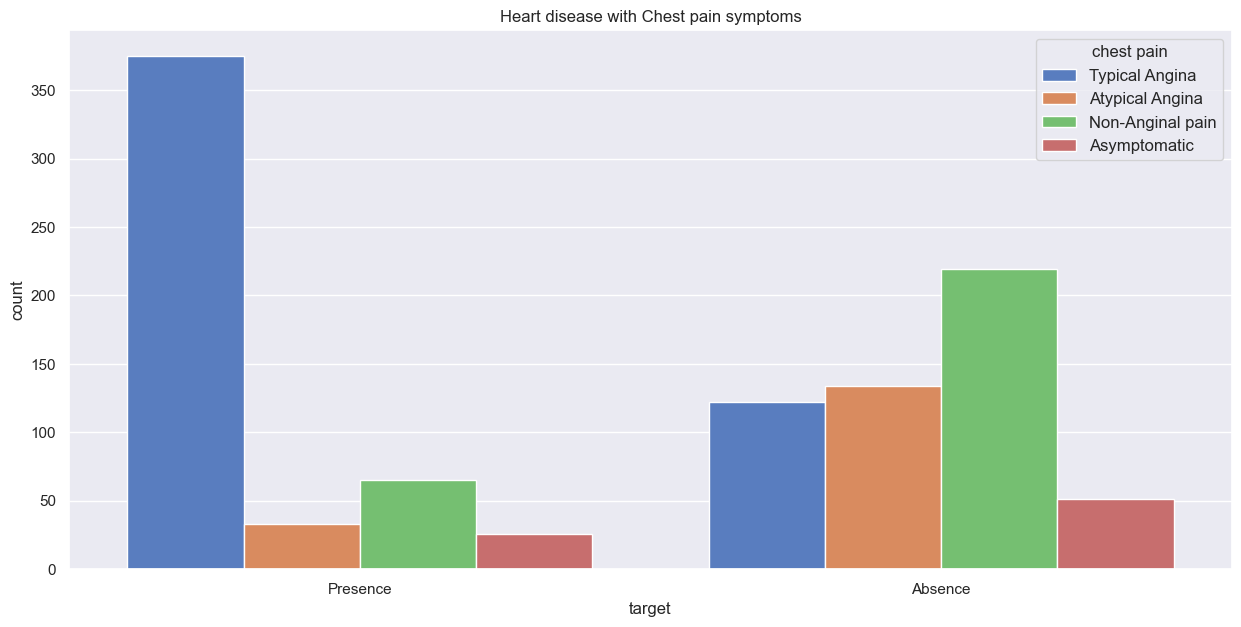

In [219]:
plt.figure(figsize=(15,7))
sns.countplot(x='target', hue='cp', data=data, order=['Presence', 'Absence'])
plt.legend(title='chest pain', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal pain', 'Asymptomatic'], fontsize=12)
plt.title("Heart disease with Chest pain symptoms")
plt.show()

It is very interesting to see that Typical Angina chest pain patients are more affected by Heart Disease even than other chest pain patients


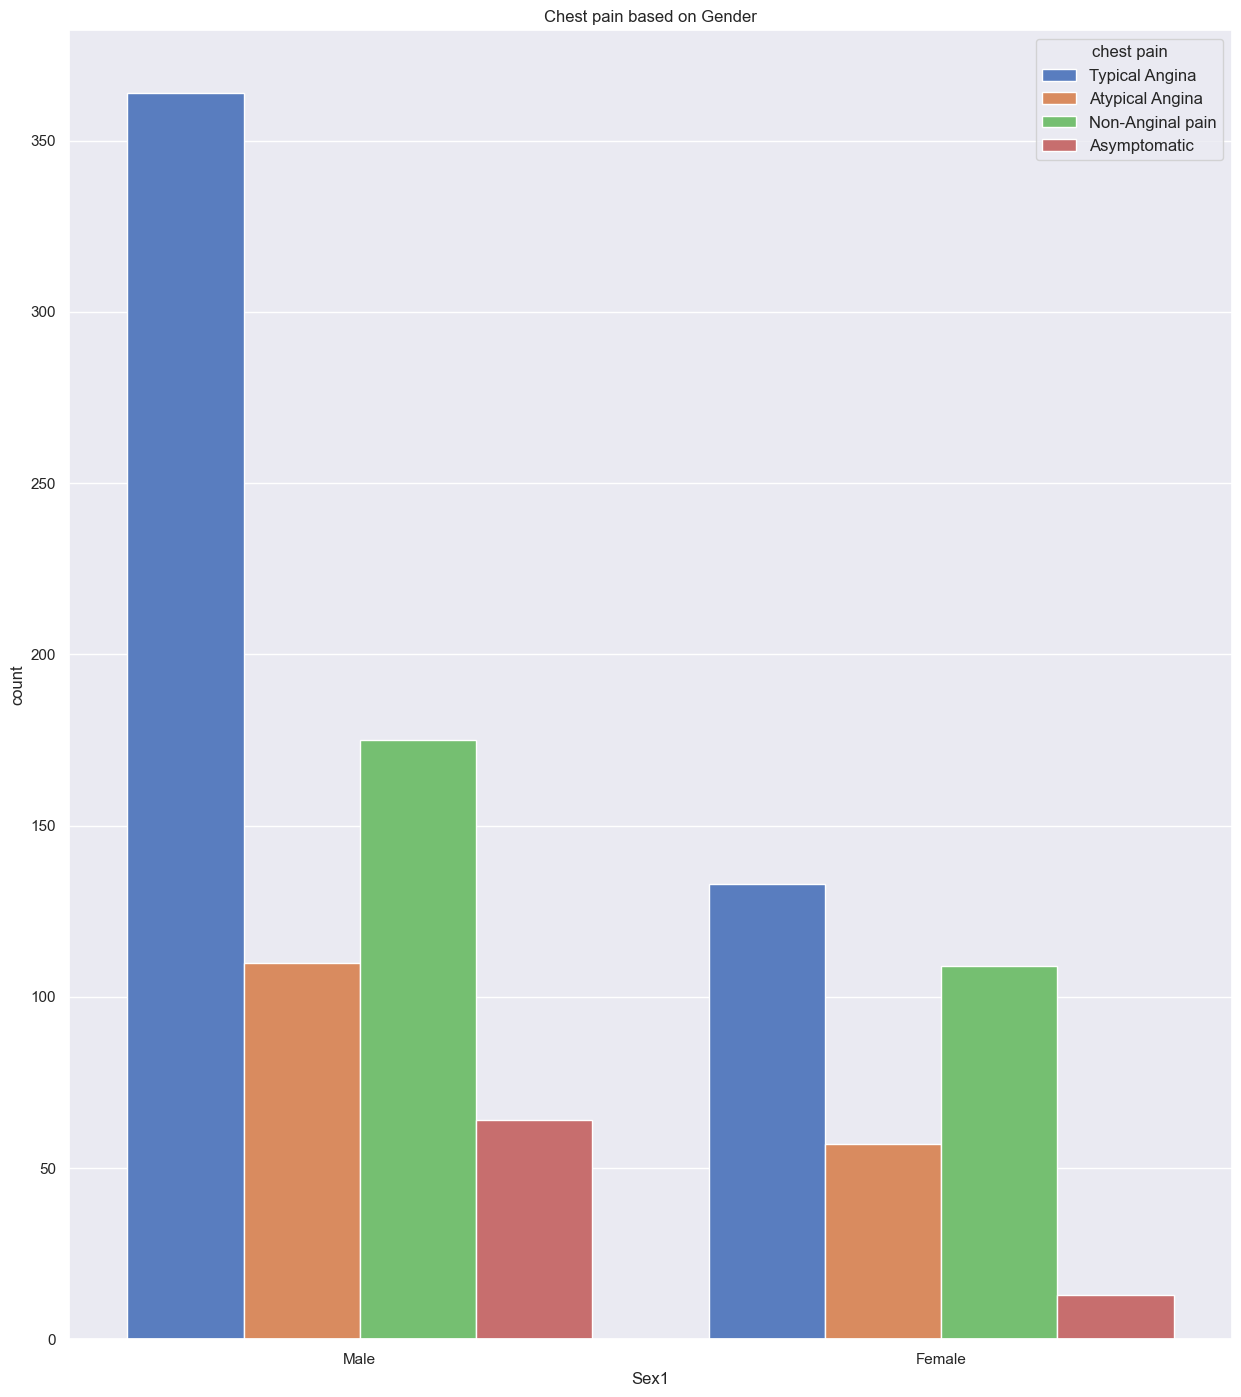

In [220]:
plt.figure(figsize=(15,17))
sns.countplot(x='Sex1', hue='cp', data=data)
plt.legend(title='chest pain', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal pain', 'Asymptomatic'], fontsize=12)
plt.title("Chest pain based on Gender")
plt.show()

We can see that a higher number of men are suffering from Typical Agina type of Chest Pain.

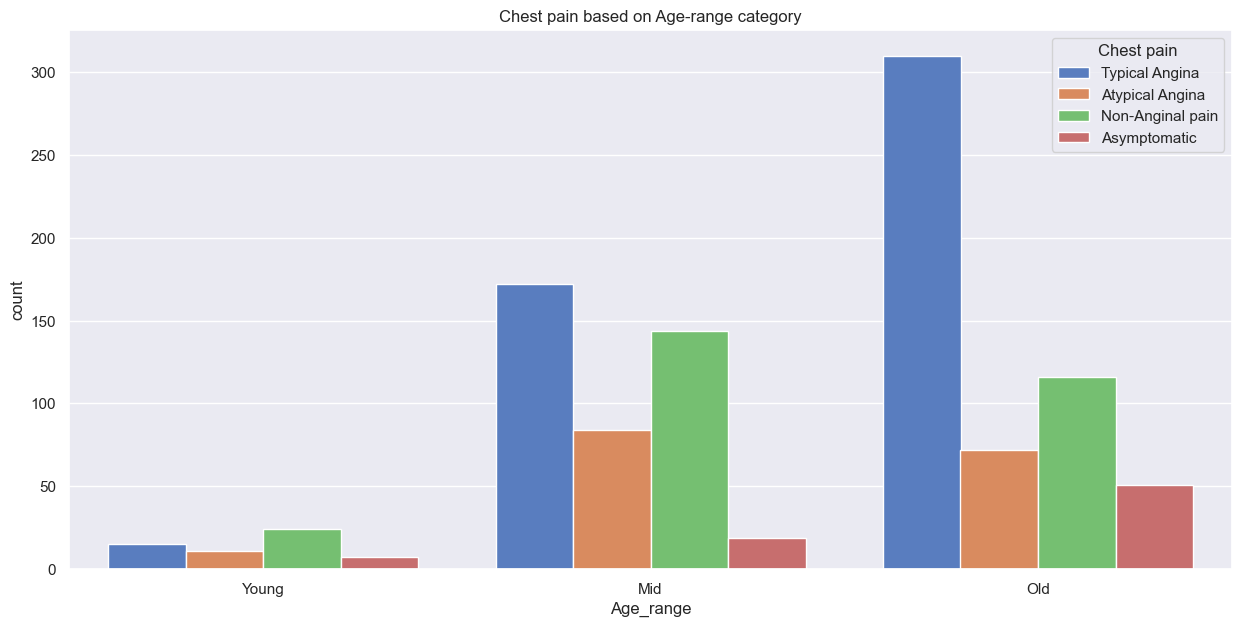

In [221]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age_range', hue='cp', data=data, order=['Young', 'Mid', 'Old'])
plt.legend(title='Chest pain', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal pain', 'Asymptomatic'])
plt.title("Chest pain based on Age-range category")
plt.show()

In young age non-anginal pain is more where in Mid and Old age Typical Angina chest pain is more

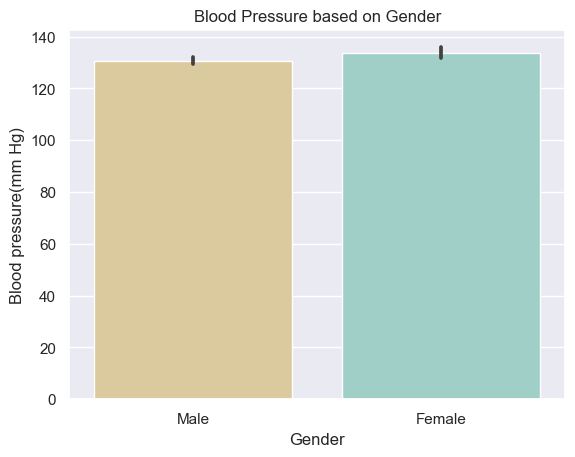

In [222]:
plt.figure()
sns.barplot(x='Sex1', y='trestbps', data=data, palette='BrBG')
plt.xlabel('Gender')
plt.ylabel("Blood pressure(mm Hg)")
plt.title('Blood Pressure based on Gender')
plt.show()

Both the Genders have nearly equal Blood pressure.

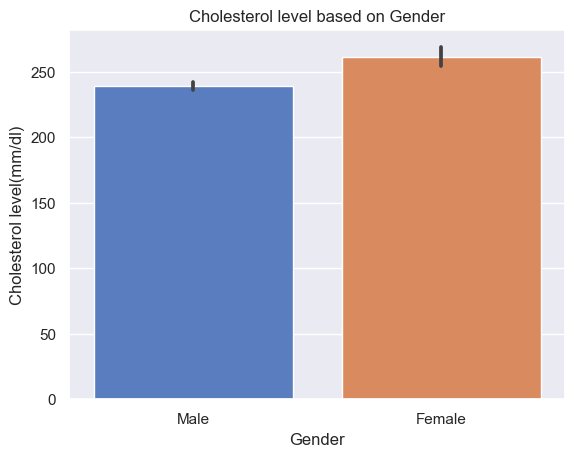

In [223]:
plt.figure()
sns.barplot(x='Sex1', y='chol', data=data)
plt.xlabel('Gender')
plt.ylabel("Cholesterol level(mm/dl)")
plt.title('Cholesterol level based on Gender')
plt.show()

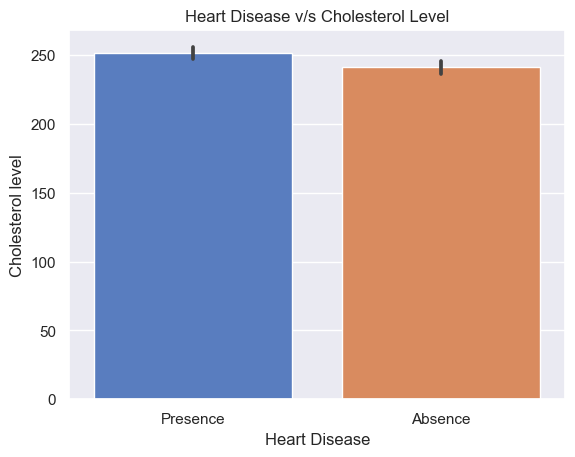

In [224]:
plt.figure()
sns.barplot(x='target', y='chol', data=data)
plt.xlabel('Heart Disease')
plt.ylabel("Cholesterol level")
plt.title('Heart Disease v/s Cholesterol Level')
plt.show()

Người mắc bệnh có trestbps thấp có cơ hội mắc bệnh cao ?

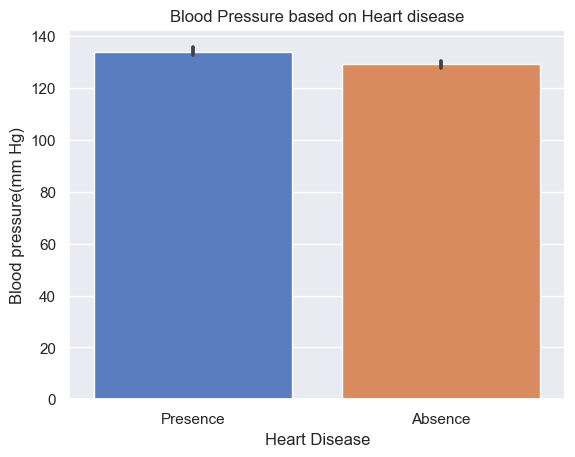

In [225]:
plt.figure()
sns.barplot(x='target', y='trestbps', data=data)
plt.xlabel('Heart Disease')
plt.ylabel("Blood pressure(mm Hg)")
plt.title('Blood Pressure based on Heart disease')
plt.show()

Blood pressure thấp hơn ở bệnh nhân tim

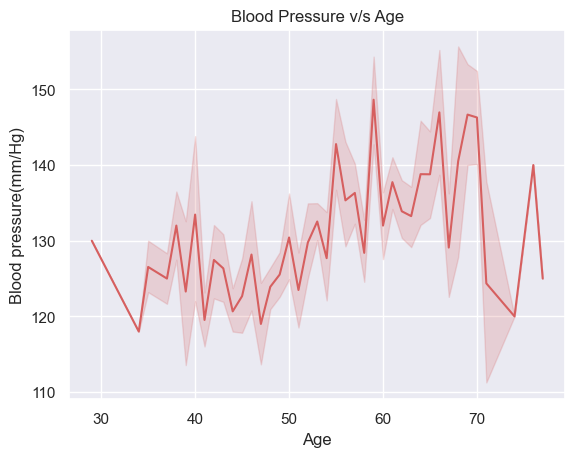

In [226]:
plt.figure() 
sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.xlabel('Age')
plt.ylabel("Blood pressure(mm/Hg)")
plt.title('Blood Pressure v/s Age')
plt.show()

Ở đây chúng ta có thể quan sát thấy rằng Huyết áp tăng trong độ tuổi từ 50 đến 60 và bằng cách nào đó tiếp tục mô hình cho đến gần 70

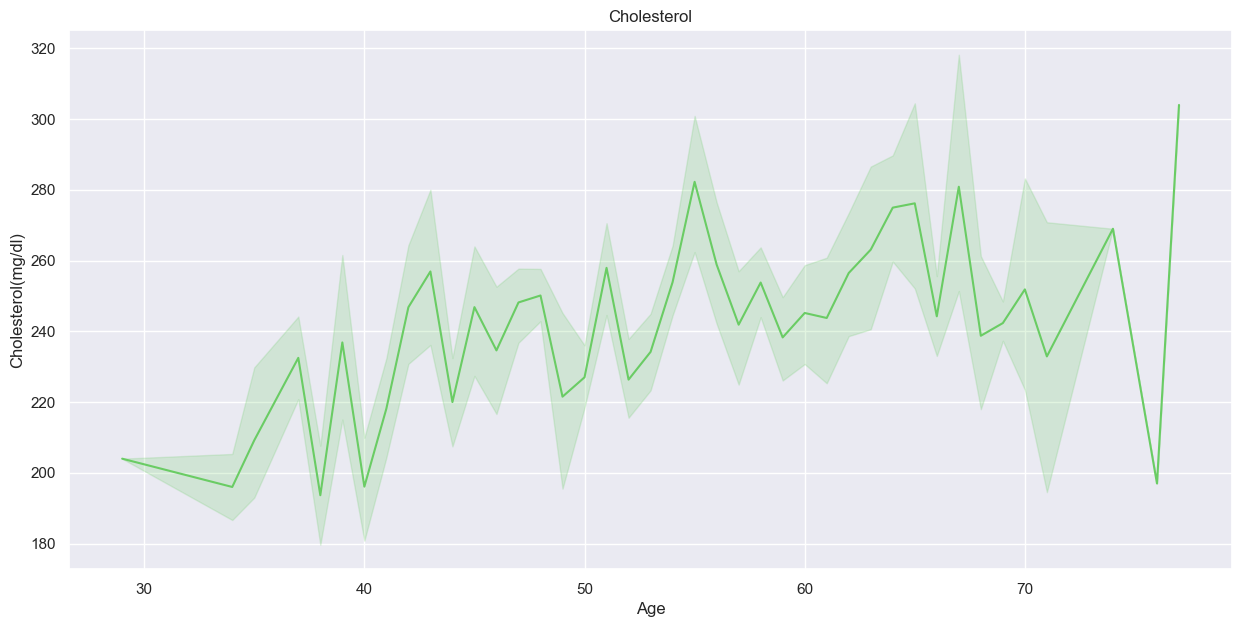

In [227]:
plt.figure(figsize=(15,7))
sns.lineplot(x='age',y='chol', data=data,color='g')
plt.xlabel('Age')
plt.ylabel("Cholesterol(mg/dl)")
plt.title('Cholesterol')
plt.show()

Cholesterol increase slightly at the age of 45-60

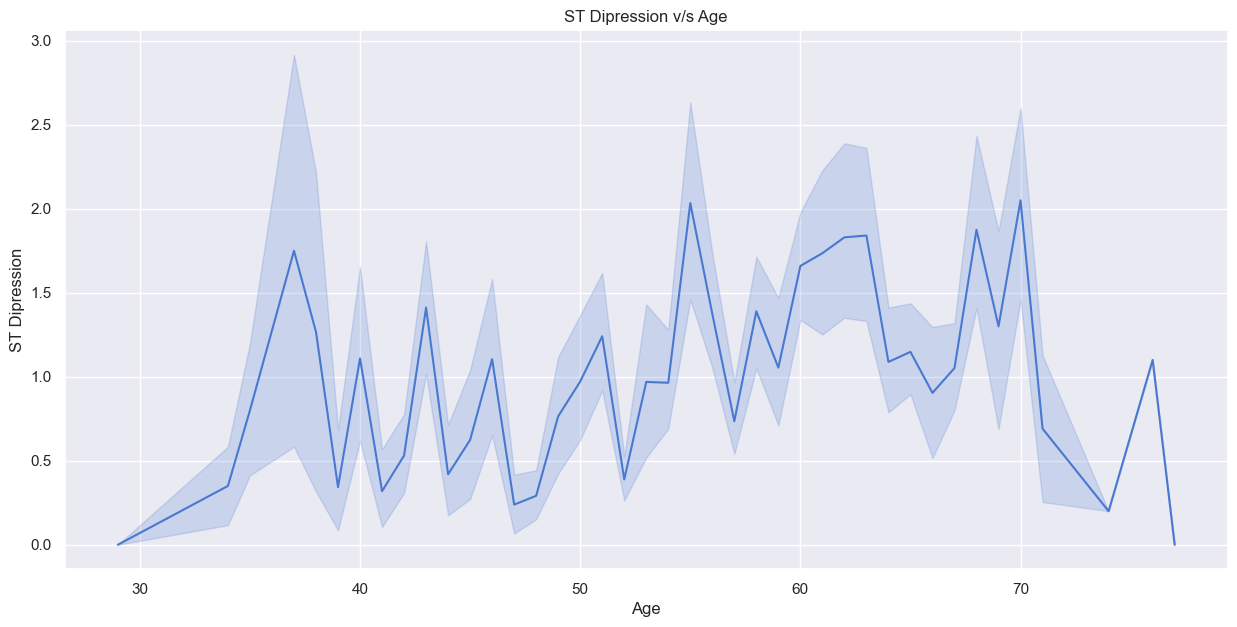

In [228]:
plt.figure(figsize=(15,7))
sns.lineplot(x='age', y='oldpeak', data=data, color='b')
plt.xlabel(xlabel='Age')
plt.ylabel(ylabel='ST Dipression')
plt.title('ST Dipression v/s Age')
plt.show()

- ST depression refers to a finding on an electrocardiogram, where in the trace in the ST segment is abormally low below the baseline.

We can see that ST dipression increases at the age 30-40 then again on 55-60

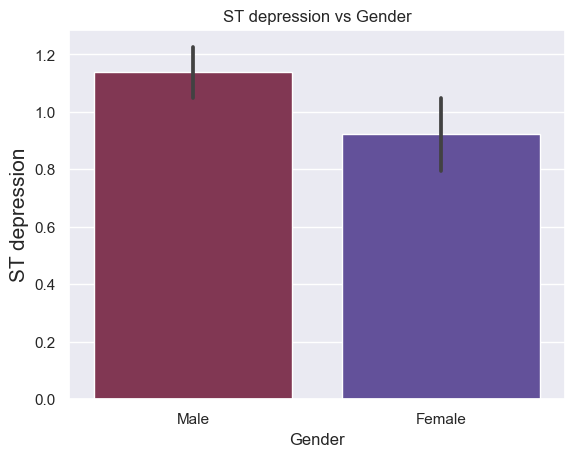

In [229]:
sns.barplot(x='Sex1',y='oldpeak', data=data, palette='twilight_r')
plt.xlabel("Gender")
plt.ylabel('ST depression', fontsize=15)
plt.title('ST depression vs Gender')
plt.show()

Males are more prone to ST dipression

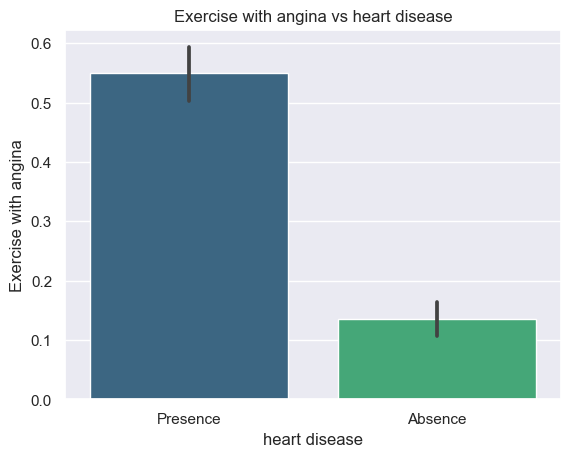

In [230]:
sns.barplot(x='target', y='exang', data=data, palette='viridis')
plt.xlabel('heart disease')
plt.ylabel("Exercise with angina")
plt.title('Exercise with angina vs heart disease')
plt.show()

If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

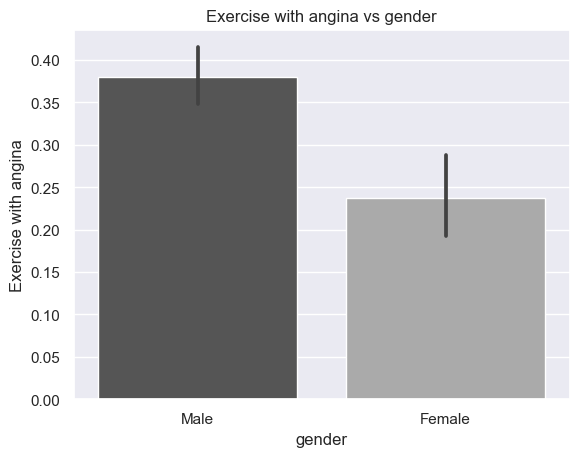

In [231]:
sns.barplot(x='Sex1', y='exang', data=data, palette='binary_r')
plt.xlabel('gender')
plt.ylabel("Exercise with angina")
plt.title('Exercise with angina vs gender')
plt.show()

Male have high Exercise Angina

Angina is a type of chest paint caused by reduced blood flow to the heart

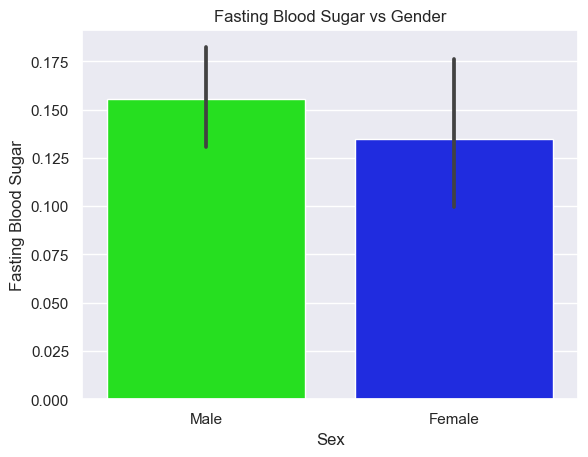

In [232]:
sns.barplot(y='fbs', x='Sex1', data=data, palette ='hsv')
plt.xlabel('Sex')
plt.ylabel("Fasting Blood Sugar")
plt.title('Fasting Blood Sugar vs Gender')
plt.show()

Males have high no of Fasting Blood Sugar over 120

C:\Users\TotNguyen\AppData\Local\Temp\ipykernel_10424\2558687336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Reds', linewidths=3)


<AxesSubplot: >

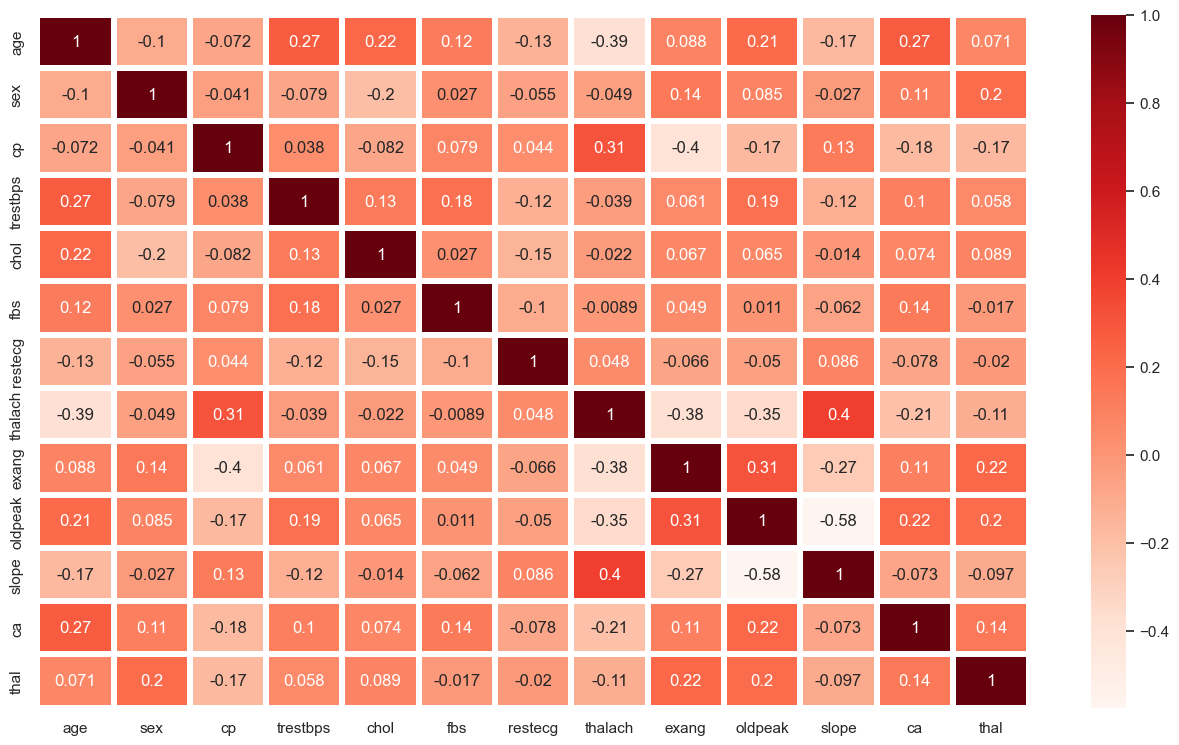

In [233]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, cmap='Reds', linewidths=3)

In [234]:
data.to_csv("heart_disease_dataset_BI.csv", index=False)

## III. Data Preprocessing

## IV. Model Training

## V. Evaluation